## Attractor Networks

### Problem 1: Ring Attractor Dynamics in Drosophila

#### Part A: Model Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##### Network Architecture

##### Parameters

In [4]:
N = 100          # Number of excitatory neurons
T = 1000         # Simulation time steps
dt = 0.1         # Time step size

# Neuron parameters
tau_exc = 60.0   # Excitatory time constant (slower dynamics)
tau_inh = 10.0   # Inhibitory time constant
beta = 5.0       # Sigmoid steepness
theta= 0.4       # Activation threshold

# Connection parameters
sigma = 8.0      # Width of excitatory connections
w_exc_amp = 2.0  # Strength of excitatory connections
w_inh = 10.953      # Global inhibition strength
w0 = 1.0         # Input to inhibitory neuron

##### Initialization

In [5]:
# Initialize activities
r_exc = np.zeros((N, T))
r_inh = np.zeros(T)

# Create Gaussian weight matrix (modular arithmetic: in circular organization)
# neuron that are closer in circle are stronger connected
w_exc = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        dist = min(abs(i - j), N - abs(i - j))  # modular (circular) distance
        w_exc[i, j] = w_exc_amp * np.exp(-dist**2 / (2 * sigma**2))

# Sigmoid activation function
def F(x):
    return 1 / (1 + np.exp(-beta*(x - theta)))

# Initialize the gaussian bump
center = N // 2
width = 5
r_exc[center - width:center + width + 1, 0] = np.exp(-np.linspace(-3, 3, 2 * width + 1)**2)

#### Part B: Stimulation

##### Part B.1: Stable Bump Attractor

The bump is stable over time.

In [6]:
# Simulation loop
for t in range(1, T):
    # Update inhibitory neuron to enforce global inhibition: derived from the model dynamic
    # new response = old response + dt/tau_inh * (-old response + F(w0*np.sum(r_exc[:,t-1])))
    r_inh[t] = r_inh[t-1] + (dt / tau_inh) * (-r_inh[t-1] + F(w0 * np.sum(r_exc[:, t-1])))

    # Update excitatory neurons: derived from model dynamic
    # scale the inhibitory input to the excitatory neurons, then apply the sigmoid activation
    # new response = old response + dt/tau_exc * (-old response + F(exc_input))
    exc_input = w_exc @ r_exc[:, t-1] - w_inh * r_inh[t]
    r_exc[:, t] = r_exc[:, t-1] + (dt / tau_exc) * (-r_exc[:, t-1] + F(exc_input))
    # F(exc_input) is where the neuron want to go
    # r_exc[:,t] is where the neuron is
    # r_exc[:,t-1] is the previous state

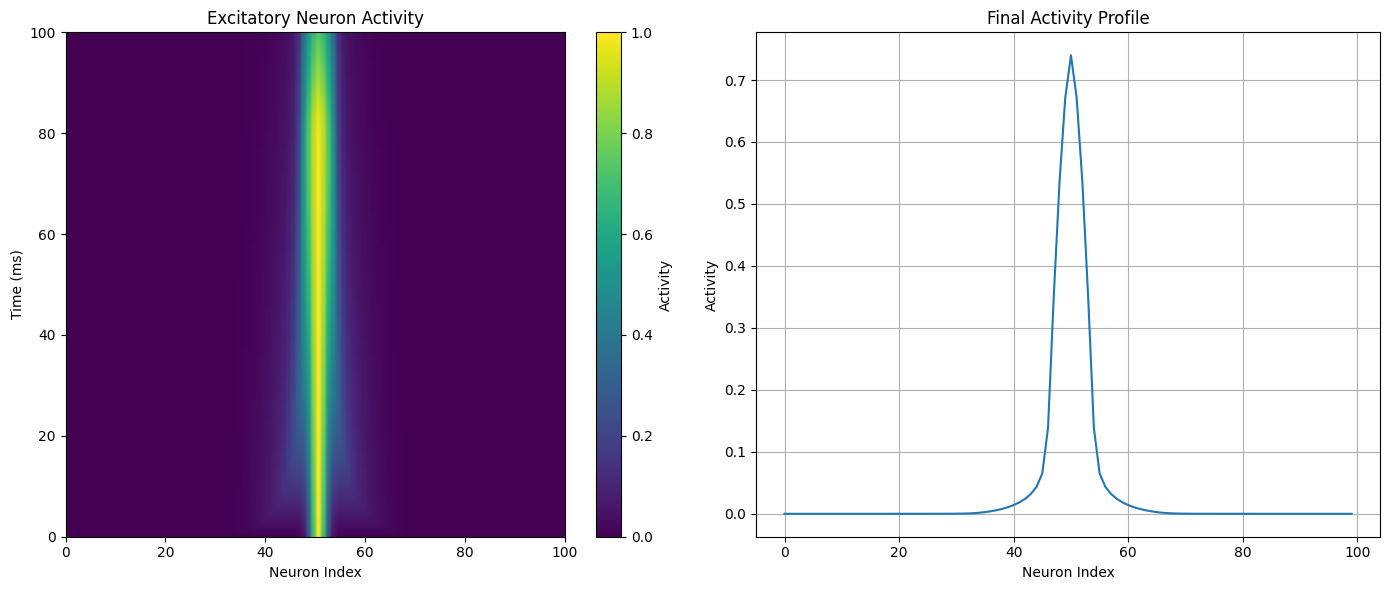

In [7]:
plt.figure(figsize=(14, 6))

# Space-time plot
plt.subplot(1, 2, 1)
plt.imshow(r_exc.T, aspect='auto', cmap='viridis', extent=[0, N, 0, T*dt], origin='lower')
plt.colorbar(label='Activity')
plt.xlabel('Neuron Index')
plt.ylabel('Time (ms)')
plt.title('Excitatory Neuron Activity')

# Final activity profile
plt.subplot(1, 2, 2)
plt.plot(r_exc[:,-1])
plt.xlabel('Neuron Index')
plt.ylabel('Activity')
plt.title('Final Activity Profile')
plt.grid(True)

plt.tight_layout()
plt.show()


##### Part B.2: Stimulus-Driven Bump Formation

apply transient stimulation on neuron 30: Bump forms in the stimulated region and persists after the input in removed.

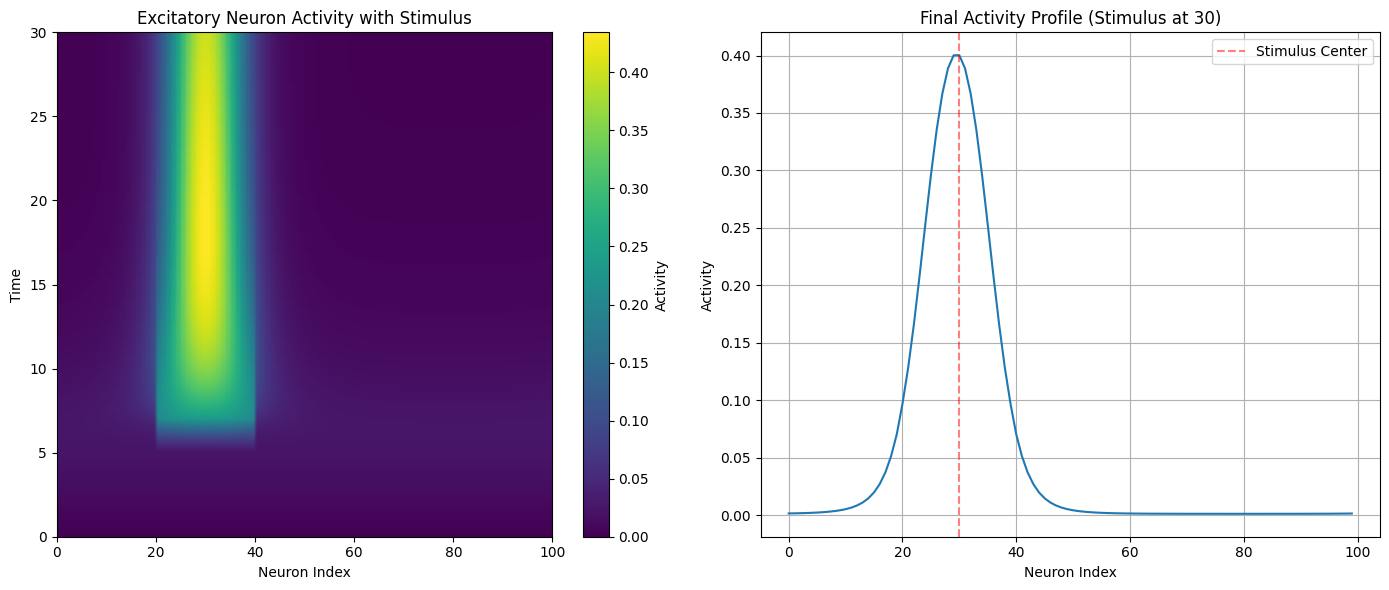

In [8]:
N = 100
T = 300 
dt = 0.1

tau_exc = 5
tau_inh = 2 

def F(z, beta=5, theta=0.7):
    return 1 / (1 + np.exp(-beta * (z - theta)))

w_exc_amp = 0.25     
sigma = 10          
winh = 0.8873          
w0 = 0.15            

r_exc = np.zeros((N, T))
r_inh = np.zeros(T)

w_exc = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        dist = min(abs(i - j), N - abs(i - j))
        w_exc[i, j] = w_exc_amp * np.exp(-dist**2 / (2 * sigma**2))

stim_center = 30
stim_width = 10
stim_strength = 0.5
stim_start, stim_end = 50, 70

I = np.zeros((N, T))
I[stim_center - stim_width:stim_center + stim_width, stim_start:stim_end] = stim_strength

for t in range(1, T):
    total_exc_input = np.sum(w0 * r_exc[:, t-1])
    r_inh[t] = r_inh[t-1] + (dt / tau_inh) * (-r_inh[t-1] + F(total_exc_input))

    exc_input = w_exc @ r_exc[:, t-1] + I[:, t-1] - winh * r_inh[t]
    r_exc[:, t] = r_exc[:, t-1] + (dt / tau_exc) * (-r_exc[:, t-1] + F(exc_input))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(r_exc.T, aspect='auto', cmap='viridis', extent=[0, N, 0, T*dt], origin='lower')
plt.colorbar(label='Activity')
plt.xlabel('Neuron Index')
plt.ylabel('Time')
plt.title('Excitatory Neuron Activity with Stimulus')

plt.subplot(1, 2, 2)
plt.plot(r_exc[:, -1])
plt.xlabel('Neuron Index')
plt.ylabel('Activity')
plt.title(f'Final Activity Profile (Stimulus at {stim_center})')
plt.grid(True)
plt.axvline(x=stim_center, color='r', linestyle='--', alpha=0.5, label='Stimulus Center')
plt.legend()

plt.tight_layout()
plt.show()


Try different stimulus locations and show flexibility of bump location.

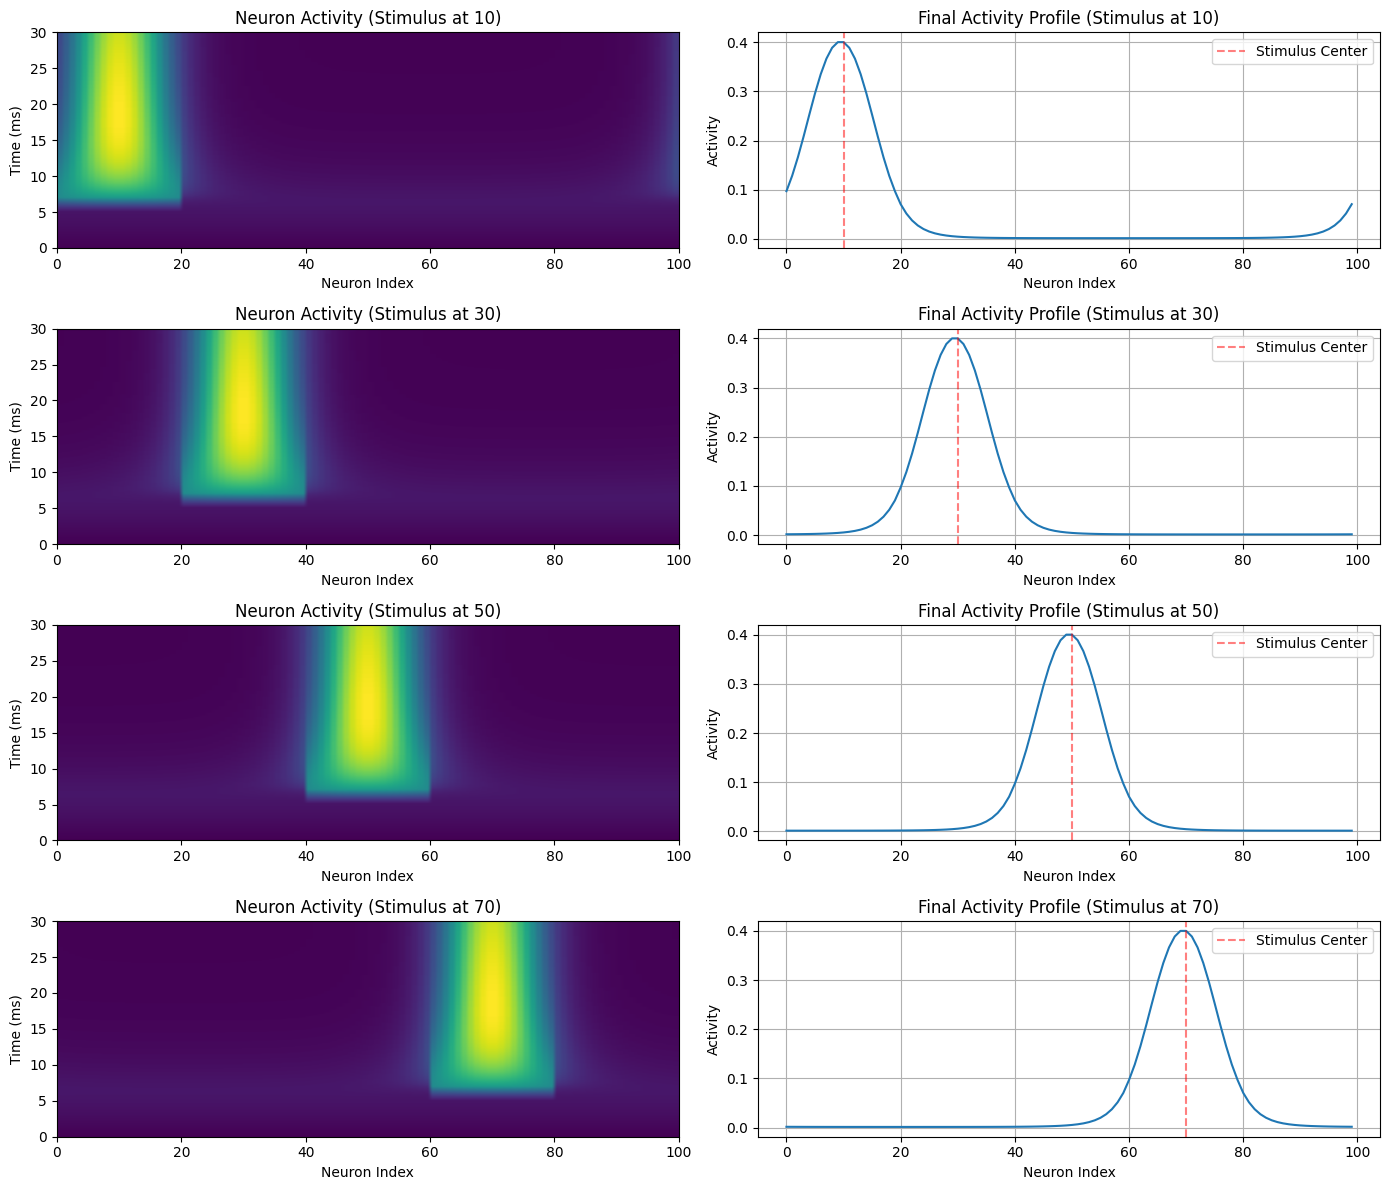

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 100  
T = 300  
dt = 0.1  
tau_exc = 5  
tau_inh = 2  

w_exc_amp = 0.25     
sigma = 10          
winh = 0.8873          
w0 = 0.15    

def F(z, beta=5, theta=0.7):
    return 1 / (1 + np.exp(-beta * (z - theta)))

stim_centers = [10, 30, 50, 70] 
stim_strength = 0.5    
stim_start, stim_end = 50, 70  

fig, axes = plt.subplots(len(stim_centers), 2, figsize=(14, 3 * len(stim_centers)))
for idx, stim_center in enumerate(stim_centers):
    r_exc = np.zeros((N, T))
    r_inh = np.zeros(T)
    I = np.zeros((N, T))
    I[stim_center-10:stim_center+10, stim_start:stim_end] = stim_strength

    w_exc = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            dist = min(abs(i - j), N - abs(i - j))
            w_exc[i, j] = w_exc_amp * np.exp(-dist**2 / (2 * sigma**2))

    for t in range(1, T):
        total_exc_input = np.sum(w0 * r_exc[:, t-1])
        r_inh[t] = r_inh[t-1] + (dt / tau_inh) * (-r_inh[t-1] + F(total_exc_input))
        exc_input = w_exc @ r_exc[:, t-1] + I[:, t-1] - winh * r_inh[t]
        r_exc[:, t] = r_exc[:, t-1] + (dt / tau_exc) * (-r_exc[:, t-1] + F(exc_input))

    ax1 = axes[idx, 0] if len(stim_centers) > 1 else axes[0]
    ax1.imshow(r_exc.T, aspect='auto', cmap='viridis', extent=[0, N, 0, T * dt], origin='lower')
    ax1.set_xlabel('Neuron Index')
    ax1.set_ylabel('Time (ms)')
    ax1.set_title(f'Neuron Activity (Stimulus at {stim_center})')
    
    ax2 = axes[idx, 1] if len(stim_centers) > 1 else axes[1]
    ax2.plot(r_exc[:, -1])
    ax2.axvline(x=stim_center, color='r', linestyle='--', alpha=0.5, label='Stimulus Center')
    ax2.set_xlabel('Neuron Index')
    ax2.set_ylabel('Activity')
    ax2.set_title(f'Final Activity Profile (Stimulus at {stim_center})')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()


##### Part B.3: Parameter Exploration

Increasing winh (stronger global inhibition) suppress bump formation.

Increasing σw (wider excitation kernel) make bumps broader and less localized. When excitation kernel is too wide and with not enough global inhibition, it will result in uncontrolled spread of activity and more neurons will be activated simultaneously instead of forming a localized "bump".

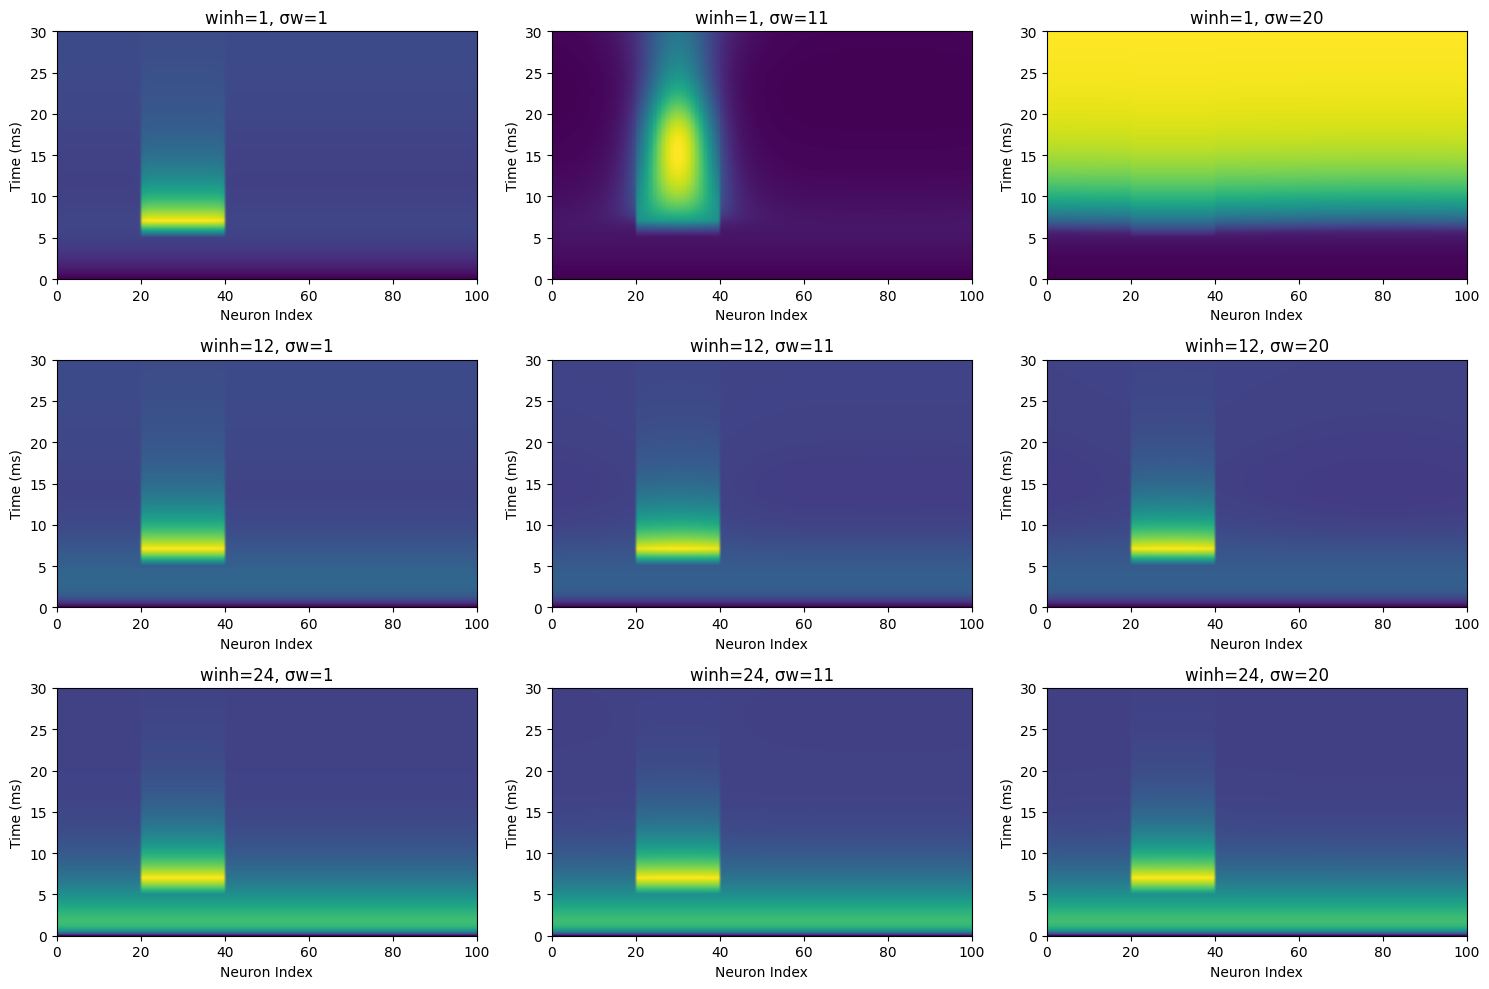

In [13]:
N = 100  
T = 300  
dt = 0.1  
tau_exc = 5  
tau_inh = 2  
A = 0.25  
w0 = 0.15  

def F(z, beta=5, theta=0.7):
    return 1 / (1 + np.exp(-beta * (z - theta)))

winh_values = [1, 12, 24]
sigma_w_values = [1, 11, 20]
stim_center = 30  
stim_strength = 0.5    
stim_start, stim_end = 50, 70  

fig, axes = plt.subplots(len(winh_values), len(sigma_w_values), figsize=(15, 10))

for i, winh in enumerate(winh_values):
    for j, sigma_w in enumerate(sigma_w_values):
        w_exc = np.zeros((N, N))
        for n in range(N):
            for m in range(N):
                dist = min(abs(n - m), N - abs(n - m))
                w_exc[n, m] = A * np.exp(-dist**2 / (2 * sigma_w**2))

        r_exc = np.zeros((N, T))
        r_inh = np.zeros(T)

        I = np.zeros((N, T))
        I[stim_center-10:stim_center+10, stim_start:stim_end] = stim_strength

        for t in range(1, T):
            total_exc_input = np.sum(w0 * r_exc[:, t-1])
            r_inh[t] = r_inh[t-1] + (dt / tau_inh) * (-r_inh[t-1] + F(total_exc_input))
            exc_input = w_exc @ r_exc[:, t-1] + I[:, t-1] - winh * r_inh[t]
            r_exc[:, t] = r_exc[:, t-1] + (dt / tau_exc) * (-r_exc[:, t-1] + F(exc_input))

        ax = axes[i, j]
        ax.imshow(r_exc.T, aspect='auto', cmap='viridis', extent=[0, N, 0, T * dt], origin='lower')
        ax.set_title(f'winh={winh}, σw={sigma_w}')
        ax.set_xlabel('Neuron Index')
        ax.set_ylabel('Time (ms)')

plt.tight_layout()
plt.show()


#### Part C: Analysis and Discussion

Q1: Why is the central inhibitory neuron necessary for stabilizing the bump?

By providing global feedback inhibition, the central inhibitory neuron creates "competition" between excitatory neurons that prevents runaway excitation and maintain localized activity (a stable activity bump). With the inhibitory neuron strength w_inh, it normalize the network activity: stronger inhibition, more focused bump. 

Q2: What happens when winh = 0? When w0 = 0?

When the inhibitory connection strength (w_inh) is set to zero, the network loses this "competitive" mechanism. Without global inhibition, the local excitatory connections will spread uncontrollably across the entire ring, resulting in a uniform high-activity state rather than a localized bump. Similarly, if the input to the inhibitory neuron (w0) is zero, the inhibitory neuron becomes non-functional as it receives no excitatory input, leading to similar uncontrolled excitation as with w_inh=0.

Q3: Can the network support multiple bumps? Why or why not?

The network typically cannot support multiple stable bumps simultaneously due to the global inhibition nature. In class, we talked about the "winner-takes-all" dynamics created by the inhibitory neuron suppress all potential bumps except the strongest one. Imagine if two bumps appeared at the same time, both group would start excitating their neighbor but also the global inhibitory neuron to inhibit the excitation uniformally. in this case, the bump with stronger excitation could survive the uniform inhbition.

Q4: Under what conditions does the bump drift or dissipate?

One possibility for bump drfting is that there's asymmetry in excitation kernel, the excitation on one side of the bump may be stronger or more stable than the other, and the bump would drift toward the side when the excitation is spreading much stably. One posibility for bump dissipate may be due to condition where there's excessive inhibition (large w_inh) because it can suppress neural activity across the entire network, preventing the formation or maintenance of a bump; it can also because of insuffficient excitation (sigma_w) because neighboring neurons may not activate each other enough to maintain the bump. 

### Problem 2: Transition to Chaos in Random Nueral Networks

#### Part A: Model Definition

In [11]:
N = 500                             # Number of neurons
tau = 1                             # Time constant
T = 200                             # Simulation time
dt = 0.1                            # Time step
steps = int(T / dt)                 # Total steps
g_values = [0.5, 1.0, 1.5, 2.0]     # Gain parameter scaling recurrent input


def F(z):
    return np.tanh(z)

# Initialize synaptic weight matrix (random Gaussian)
# no longer a ring attractor with local connectivity
J = np.random.normal(0, 1/np.sqrt(N), (N, N))

# Time evolution function
def simulate(g):
    r = np.random.normal(0, 0.1, (N, steps))  # Initial firing rates (small noise)
    
    for t in range(1, steps):
        # this line is the differential euqaiton
        drdt = (-r[:, t-1] + F(g * J @ r[:, t-1])) / tau
        # this line is to solve the equation
        r[:, t] = r[:, t-1] + dt * drdt
    return r


#### Part B: Stimulation

At low g, we see neuron activity with population variance gradually come to 0;

At higher g, we see chaotic yet sustained recursive neuron activity: neuron are turned on for a sustained period, then turned off for sustained period, and happen recursively, and the population variance went osciliating around a fixed point.


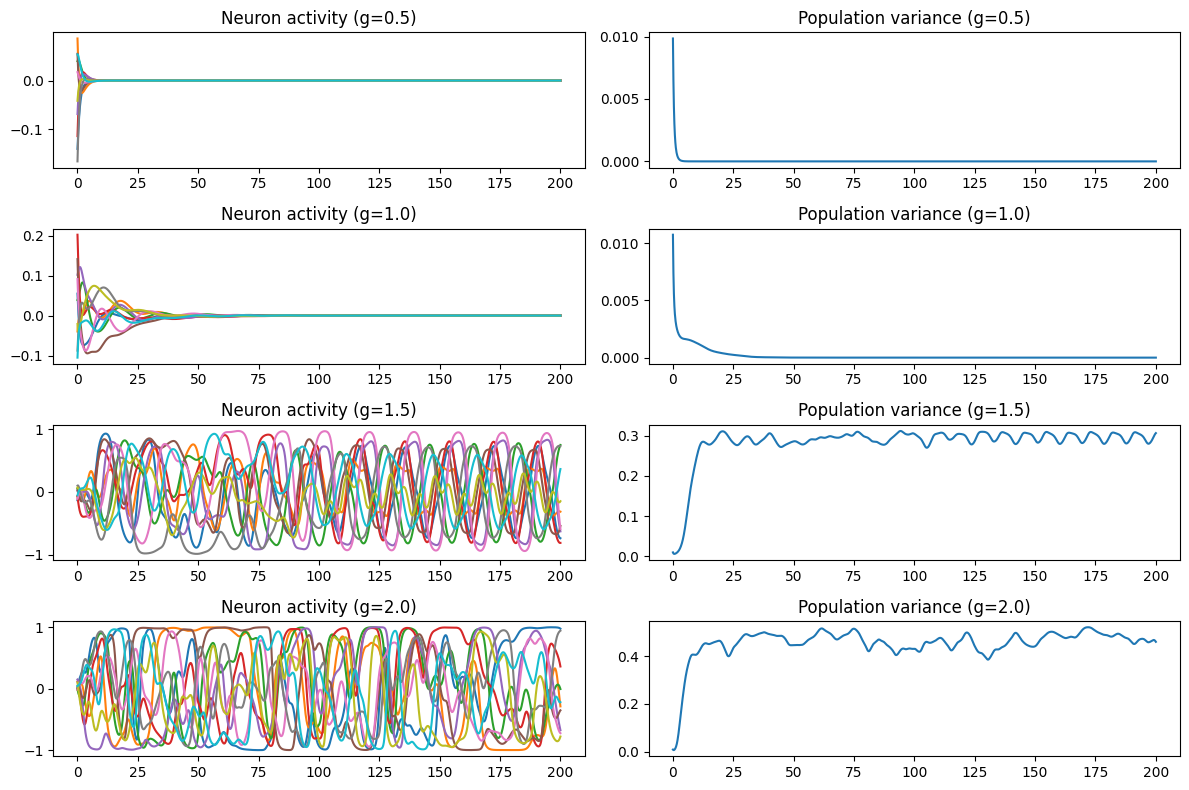

In [12]:
# Simulations for different gain values
fig, axes = plt.subplots(len(g_values), 2, figsize=(12, 8))

for i, g in enumerate(g_values):
    r = simulate(g)
    
    # Plot trajectories of 10 randomly selected neurons
    # each color represent a different neuron
    neurons_to_plot = np.random.choice(N, 10, replace=False)
    for neuron in neurons_to_plot:
        axes[i, 0].plot(np.linspace(0, T, steps), r[neuron, :])
    axes[i, 0].set_title(f"Neuron activity (g={g})")

    # Compute and plot population variance over time
    var_pop = np.var(r, axis=0)
    axes[i, 1].plot(np.linspace(0, T, steps), var_pop)
    axes[i, 1].set_title(f"Population variance (g={g})")

plt.tight_layout()
plt.show()

#### Part C: Analysis and Discussion

Q1: Around what value of g does the network transition from stability to chaos?

The transition from stability to chaos occurs around g≈1 to g≈1.5. When g<1, network activity goes to a fixed point. At g≈1, very small fluctuations started to occur, and for g>1, activity becomes chaotic. 

Q2: How does the time evolution of population variance differ across regimes?

for low g<1, variance decreases as neurons settle into a fixed state; at critical point g=1, variance remains moderate; and for high g>1, it fluctuates irregularly due to chaotic activity. In the chaotic regime, neurons switch between active and inactive states, leading to variability in network dynamics.

Q3: Why does increasing g destabilize the network?

The instability of the network as g increases is tied to the amplification of recurrent inputs. In a recurrent neural network, each neuron's activity is influenced by the weighted sum of other neurons’ activities, scaled by the gain parameter g is small, any small perturbation in neural activity is gradually dampened over time, leading the network to settle into a stable fixed-point state.g increases, the impact of recurrent feedback grows stronger. Instead of decaying, small fluctuations in neural activity get reinforced and amplified at each time step. This leads to growing oscillations and irregular activity patterns, eventually transitioning into a chaotic regime where neurons continuously fluctuate in an unpredictable manner.

Mathematically, the recurrent update rule in our model is:
$r(t+1)=F(Wr(t))=F(gJr(t))$

To analyze stability, we can linearize the system around a fixed point. We can first assume $F$ is approximately linear near zero by some scale $F(z) ≈ az$, the dynamic now become:
$r(t+1) ≈ agJr(t)$

Now, the stability of the system is governed by the largest eigenvalue of the effective connectivity matrix $agJ$. We know that for a random matrix J, the largest eigenvalue can be scaled as: $\sqrt{N\sigma^2}$

When the eigenvalue exceed 1, we have instability: $ag\sqrt{N\sigma^2}>1$,  $g>\frac{1}{ag\sqrt{N\sigma^2}}$

Looking at this condition, by increasing g, we increases the risk of instability. When g crosses the critical value (in here, g=1), small perturbations in the network no longer decay but instead grow, pushing the system into a chaotic regime.

Q4: How do the dynamics differ qualitatively from the ring attractor network in Problem 1?

The ring attractor network exhibits structured dynamics that enable it to maintain a stable bump of activity and preserve a memory of past input even after the stimulus is removed. In contrast, the random recurrent network lacks structured connectivity, and when the gain g is high, its dynamics become chaotic, erasing any memory of past input and producing unpredictable fluctuations.

The ring attractor network in problem 1 maintains a stable bump of activity due to its structured connectivity. This is because of its update dynamic for excitatory population follows a Mexican-hat connectivity pattern (as we discussed in class). Specifically, excitatory neurons are arranged on a ring and connected to one another with weights that fall off as a Gaussian function of distance — meaning each neuron strongly excites its neighbors and weakly (or not at all) excites distant neurons. Inhibitory feedback is provided by a single global inhibitory neuron that sums total excitatory activity and feeds back uniform inhibition. This structure ensures that a localized bump of activity forms in response to input. Due to recurrent excitatory interactions, this bump persists even after input removal (the network still have memory about the inject location). 

In contrast, the random recurrent network does not have structured connectivity. Instead, $W=gJ$ is a random connectivity matrix following gaussian distributionIn the random recurrent network, each connection between neurons is determined by drawing from a Gaussian distribution, and there is no spatial or functional structure to the connectivity. That is, neuron A could be connected to neuron B with a random weight, and this weight has no relation to how far apart the neurons are or what their roles are, in contrast with the model in problem 1.  In this experiment set up, when g exceed 1, small fluctuation will grow exponentially, resulting in chaotic dynamic. Therefore, because there's no attractor in the chaotic network, the system does not return to steady after input (there's no memory of past input or state).